In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country'] == 'United States'].dropna(subset=["salary_year_avg"])

In [4]:
job_titles = df_US['job_title'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst']

In [5]:
df_US_top6 = df_US[df_US["job_title"].isin(job_titles)]

In [9]:
job_order = df_US_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

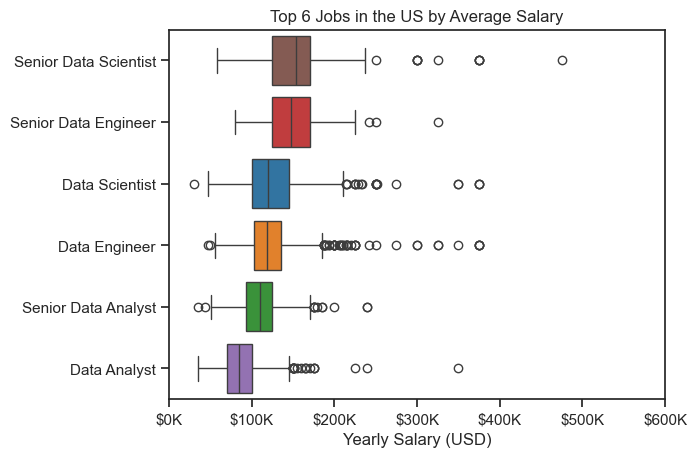

In [13]:
sns.boxplot(
    data=df_US_top6,
    x="salary_year_avg",
    y="job_title_short",
    order=job_order,
    hue="job_title_short",
    dodge=False,
    palette="tab10",
)
sns.set_theme(style="ticks")

plt.title("Top 6 Jobs in the US by Average Salary")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
plt.xlim(0, 600_000)
ticks_X = plt.FuncFormatter(lambda y, _: f"${int(y/1000)}K")
plt.gca().xaxis.set_major_formatter(ticks_X)
plt.show()